In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url = "https://drive.google.com/file/d/1dKZxapT3xLzOTOpy1LCyqctL8YEvzp4Y/view?usp=drive_link"
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


# Task 1:
**Q.1)Determine the top three most
common cuisines in the dataset**

In [8]:
df.shape

(9551, 21)

**It shows that given dataset has 9551 rows and 21 columns**

In [9]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [10]:
df['Cuisines']

0             French, Japanese, Desserts
1                               Japanese
2       Seafood, Asian, Filipino, Indian
3                        Japanese, Sushi
4                       Japanese, Korean
                      ...               
9546                             Turkish
9547     World Cuisine, Patisserie, Cafe
9548              Italian, World Cuisine
9549                     Restaurant Cafe
9550                                Cafe
Name: Cuisines, Length: 9551, dtype: object

In [11]:
df['Cuisines'].unique()

array(['French, Japanese, Desserts', 'Japanese',
       'Seafood, Asian, Filipino, Indian', ..., 'Burger, Izgara',
       'World Cuisine, Patisserie, Cafe', 'Italian, World Cuisine'],
      dtype=object)

In [13]:
print(df['Cuisines'])

0             French, Japanese, Desserts
1                               Japanese
2       Seafood, Asian, Filipino, Indian
3                        Japanese, Sushi
4                       Japanese, Korean
                      ...               
9546                             Turkish
9547     World Cuisine, Patisserie, Cafe
9548              Italian, World Cuisine
9549                     Restaurant Cafe
9550                                Cafe
Name: Cuisines, Length: 9551, dtype: object


In [27]:
# Split the 'Cuisines' column by a comma to showcase for restaurants with multiple cuisines
cuisines_series = df['Cuisines'].dropna().str.split(',').explode().str.strip()

# Get the count of each cuisine
cuisine_counts = cuisines_series.value_counts()
cuisine_counts

Cuisines
North Indian      3960
Chinese           2735
Fast Food         1986
Mughlai            995
Italian            764
                  ... 
Fish and Chips       1
Malwani              1
Cuisine Varies       1
Soul Food            1
B�_rek               1
Name: count, Length: 145, dtype: int64

In [28]:
# Display the top three cuisines
top_three_cuisines = cuisine_counts.head(3)
print("Top Three Cuisines:")
print(top_three_cuisines)

Top Three Cuisines:
Cuisines
North Indian    3960
Chinese         2735
Fast Food       1986
Name: count, dtype: int64


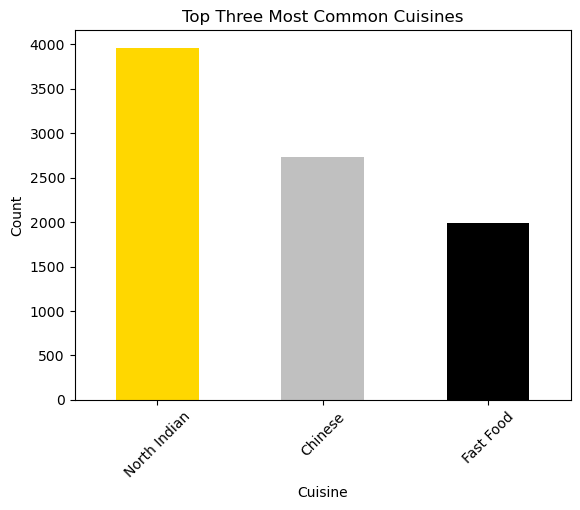

In [29]:
# Plot the top three cuisines
color=['gold','silver','black']
top_three_cuisines.plot(kind='bar', color=color)
plt.title('Top Three Most Common Cuisines')
plt.xticks(rotation=45)
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.show()

So **1.North Indian=3960
     2.Chinese=2735
     3.Fast Food=1986**
- These are top three most
common cuisines in the dataset..

**Q.2)Calculate the percentage of
restaurants that serve each of the top
cuisines**

In [30]:
# First we have to calculate the percentage of restaurants serving each cuisine
total_restaurants = df.shape[0]
cuisine_percentages = (cuisine_counts / total_restaurants) * 100

In [33]:
# To Display the top five cuisines with their percentages
top_five_percentages = cuisine_percentages.head(5)
print("Percentage of Restaurants Serving Top Three Cuisines:")
print(top_five_percentages)

Percentage of Restaurants Serving Top Three Cuisines:
Cuisines
North Indian    41.461627
Chinese         28.635745
Fast Food       20.793634
Mughlai         10.417757
Italian          7.999162
Name: count, dtype: float64


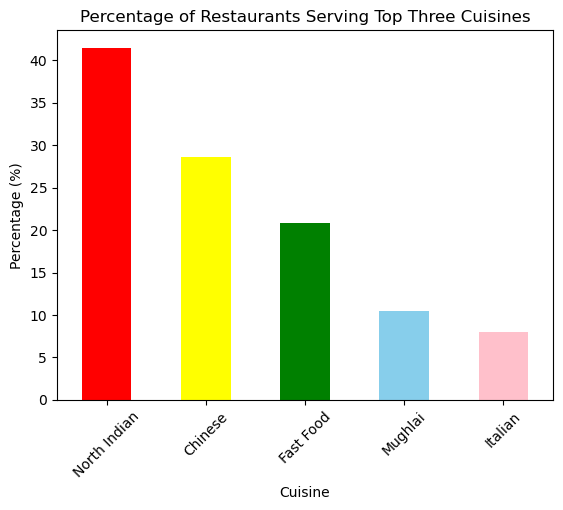

In [35]:
# Plot the top five cuisine percentages
top_three_percentages.plot(kind='bar', color=['red', 'yellow', 'green', 'skyblue','pink'])
plt.title('Percentage of Restaurants Serving Top Five Cuisines')
plt.xticks(rotation=45)
plt.xlabel('Cuisine')
plt.ylabel('Percentage (%)')
plt.show()

**These are five restaurants serving** 